#Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [ ]:
data = pd.read_csv('/content/data.csv')
df = copy.deepcopy(data)
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


#Preprocessing and Visualization Data

In [ ]:
df.isnull().sum()

,0
Company,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [ ]:
def columns_info(df):
  cols = []
  dtypes = []
  unique_v = []
  n_unique_v= []

  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtypes)
    unique_v.append(df[col].unique())
    n_unique_v.append(df[col].nunique())

  return pd.DataFrame({'Name':cols, 'Types':dtypes, 'Unique':unique_v, 'N_Unique':n_unique_v})

In [ ]:
columns_info(df)

,Name,Types,Unique,N_Unique
0,Company,object,"[AAPL, SBUX, MSFT, CSCO, QCOM, META, AMZN, TSL...",10
1,Date,object,"[07/17/2023, 07/14/2023, 07/13/2023, 07-12-202...",2516
2,Close/Last,object,"[$193.99, $190.69, $190.54, $189.77, $188.08, ...",18720
3,Volume,int64,"[50520160, 41616240, 41342340, 60750250, 46638...",25136
4,Open,object,"[$191.90, $190.23, $190.50, $189.68, $189.16, ...",18354
5,High,object,"[$194.32, $191.1799, $191.19, $191.70, $189.30...",19066
6,Low,object,"[$191.81, $189.63, $189.78, $188.47, $186.60, ...",19087


In [ ]:
df['Date'] = pd.to_datetime(df.Date, format='mixed').dt.normalize()
df['Date'].head()

,Date
0,2023-07-17
1,2023-07-14
2,2023-07-13
3,2023-07-12
4,2023-07-11


In [ ]:
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
df['Open'] = df['Open'].str.replace('$', '').astype(float)
df['High'] = df['High'].str.replace('$', '').astype(float)
df['Low'] = df['Low'].str.replace('$', '').astype(float)

In [ ]:
df.isnull().sum()

,0
Company,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [ ]:
columns_info(df)

,Name,Types,Unique,N_Unique
0,Company,object,"[AAPL, SBUX, MSFT, CSCO, QCOM, META, AMZN, TSL...",10
1,Date,datetime64[ns],"[2023-07-17 00:00:00, 2023-07-14 00:00:00, 202...",2516
2,Close/Last,float64,"[193.99, 190.69, 190.54, 189.77, 188.08, 188.6...",18720
3,Volume,int64,"[50520160, 41616240, 41342340, 60750250, 46638...",25136
4,Open,float64,"[191.9, 190.23, 190.5, 189.68, 189.16, 189.26,...",18354
5,High,float64,"[194.32, 191.1799, 191.19, 191.7, 189.3, 189.9...",19066
6,Low,float64,"[191.81, 189.63, 189.78, 188.47, 186.6, 187.03...",19087


In [ ]:
df['Company'].value_counts()

,count
Company,
AAPL,2516
SBUX,2516
MSFT,2516
CSCO,2516
QCOM,2516
META,2516
AMZN,2516
TSLA,2516
AMD,2516


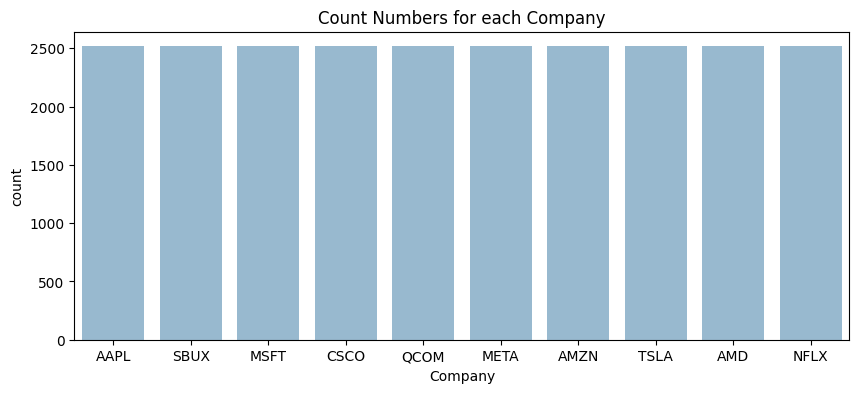

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Count Numbers for each Company')
sns.countplot(x = df['Company'], alpha=.5)
plt.show()

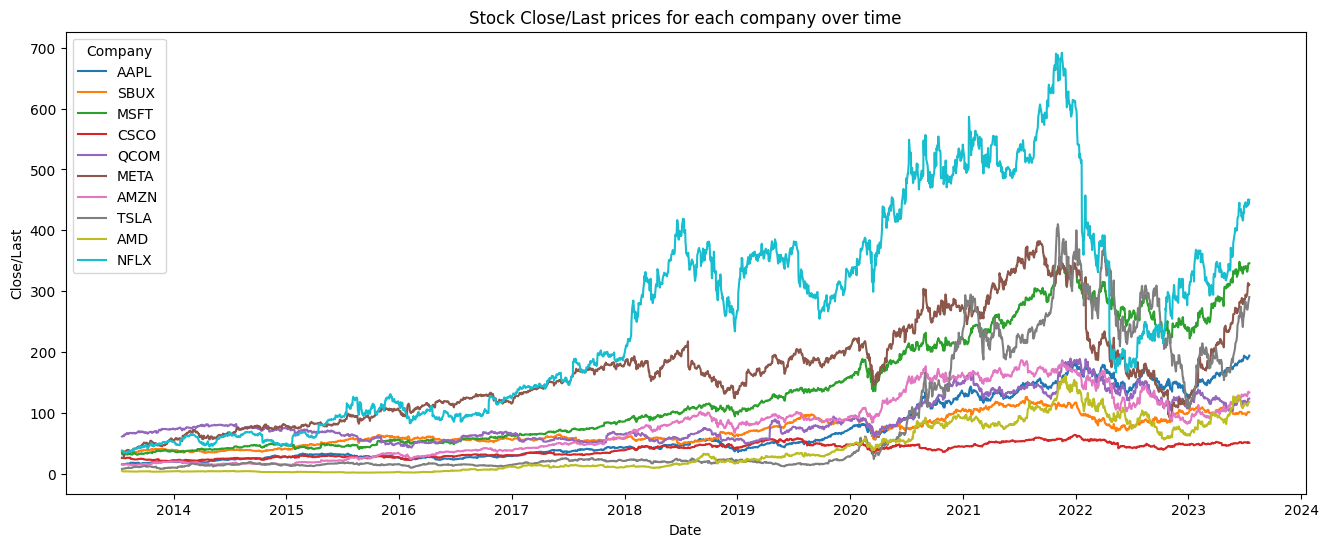

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Stock Close/Last prices for each company over time')
sns.lineplot(data=df, x='Date', y='Close/Last', hue='Company')
plt.show()

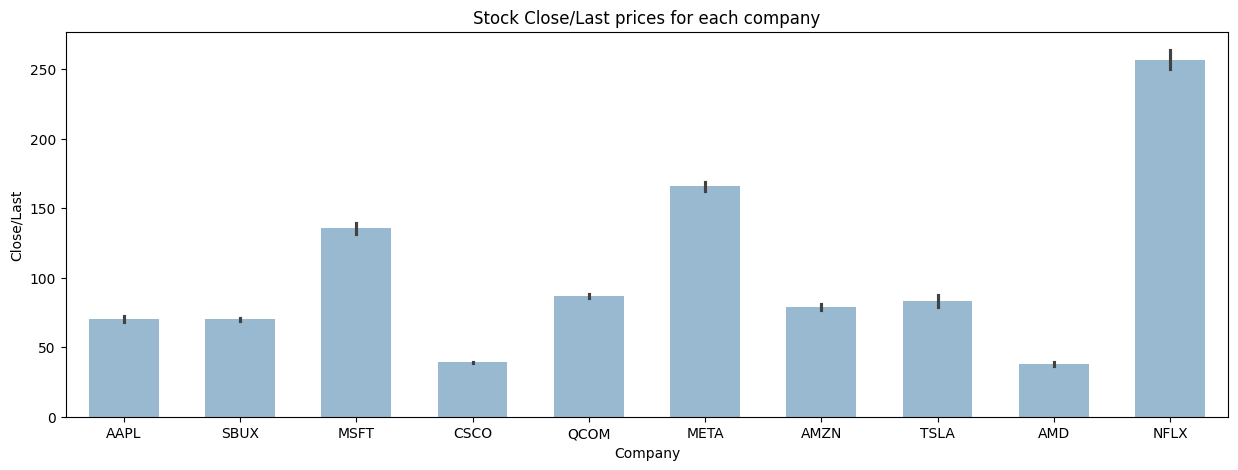

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Stock Close/Last prices for each company')
sns.barplot(x=df['Company'], y=df['Close/Last'], width=.6, data=df, alpha=0.5)
plt.show()

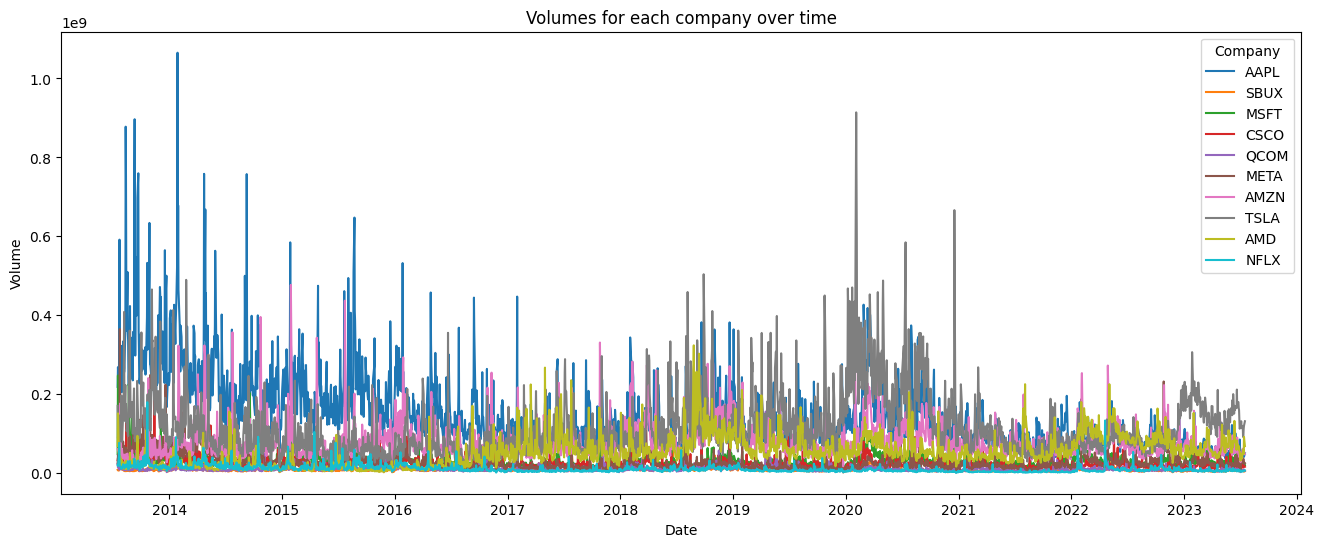

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Volumes for each company over time')
sns.lineplot(data=df, x='Date', y='Volume', hue='Company')
plt.show()

In [ ]:
encoder = LabelEncoder()
df['Company'] = encoder.fit_transform(df['Company'])

In [ ]:
df['Company'].value_counts()

,count
Company,
0,2516
8,2516
5,2516
3,2516
7,2516
4,2516
2,2516
9,2516
1,2516


In [ ]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,0,2023-07-17,193.99,50520160,191.90,194.3200,191.81
1,0,2023-07-14,190.69,41616240,190.23,191.1799,189.63
2,0,2023-07-13,190.54,41342340,190.50,191.1900,189.78
3,0,2023-07-12,189.77,60750250,189.68,191.7000,188.47
4,0,2023-07-11,188.08,46638120,189.16,189.3000,186.60


In [ ]:
correlations = df.corr()
correlations

,Company,Date,Close/Last,Volume,Open,High,Low
Company,1.000000e+00,8.393892e-15,0.171283,-0.273110,0.171336,0.172182,0.170336
Date,8.393892e-15,1.000000e+00,0.542889,-0.074317,0.542668,0.543582,0.542159
Close/Last,1.712829e-01,5.428892e-01,1.000000,-0.213019,0.999588,0.999784,0.999800
Volume,-2.731102e-01,-7.431701e-02,-0.213019,1.000000,-0.212990,-0.210444,-0.215782
Open,1.713363e-01,5.426679e-01,0.999588,-0.212990,1.000000,0.999798,0.999791
High,1.721823e-01,5.435822e-01,0.999784,-0.210444,0.999798,1.000000,0.999697
Low,1.703365e-01,5.421590e-01,0.999800,-0.215782,0.999791,0.999697,1.000000


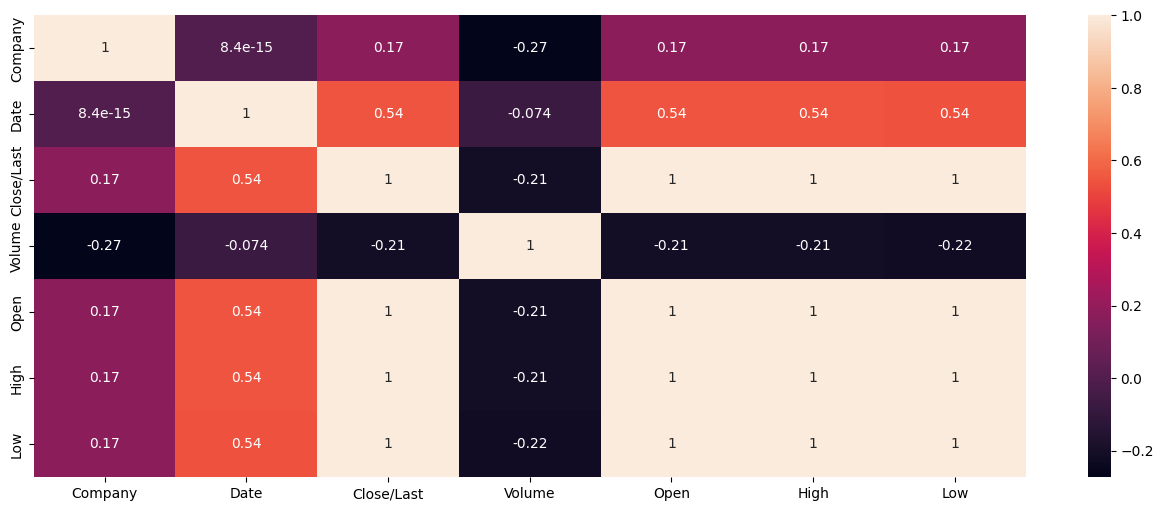

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(correlations, annot=True)
plt.show()

In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.head()

,Company,Close/Last,Volume,Open,High,Low
0,0,193.99,50520160,191.90,194.3200,191.81
1,0,190.69,41616240,190.23,191.1799,189.63
2,0,190.54,41342340,190.50,191.1900,189.78
3,0,189.77,60750250,189.68,191.7000,188.47
4,0,188.08,46638120,189.16,189.3000,186.60


In [ ]:
x=df.drop(['Close/Last', 'Company'],axis=1)
y=df['Close/Last']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3 ,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=.1, random_state=42)

#Build Model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

#Evaluation model

In [ ]:
#Check Overfitting
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)

In [ ]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_valid, y_valid_pred))

0.9998188759636648
0.9998043175230842


#Test Model

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

In [ ]:
print('Mean Squared Error : ',MSE)
print('Mean Squared Error : ',RMSE)
print('Mean Absolute Error :',MAE)
print('r2_score is : ',score)

Mean Squared Error :  1.6451310216591077
Mean Squared Error :  1.2826266103816448
Mean Absolute Error : 0.6342925174704048
r2_score is :  0.9998351812554217


In [ ]:
intercept = model.intercept_  # Intercept (beta_0)
coefficients = model.coef_    # Coefficients (beta_1, beta_2, ..., beta_n)

In [ ]:
predicted_close_Prices = intercept + np.dot(x_test, coefficients)

In [ ]:
print(f'Predicted Close Prices: {predicted_close_Prices}')

Predicted Close Prices: [ 41.32729381 141.77210105  51.27964108 ...  75.64088819  28.37183063
 113.51016035]


In [ ]:
mse = mean_squared_error(y_test, predicted_close_Prices)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 1.6451310216591077
Root Mean Squared Error: 1.2826266103816448


In [ ]:
x_new = [234684800, 19.8457145690917, 19.893928527832, 19.7150001525878]  # List of feature values

In [ ]:
# Calculate predicted Close price
predicted_close_price = intercept + np.dot(coefficients, x_new)
print(f'Predicted Close Price: {predicted_close_price}')

Predicted Close Price: 19.90998078102407


In [ ]:
actual_close_price = 19.7546424865722  # Example actual close price
print(f'Actual Close Price: {actual_close_price}')
print(f'Prediction Error: {abs(actual_close_price - predicted_close_price)}')


Actual Close Price: 19.7546424865722
Prediction Error: 0.15533829445186953
